In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Loading the Data

In [10]:
df = pd.read_csv('global_heat_index.csv')

In [11]:
df.head()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
0,2011,1,1,0,8,13.522659,986.761841,72.295858,37.288387,3.011042,0
1,2011,1,1,1,8,12.835814,986.441406,75.376186,37.686718,3.091243,0
2,2011,1,1,2,8,12.198058,985.736511,78.405198,35.053905,3.007649,0
3,2011,1,1,3,8,11.583500,985.525696,81.042980,30.135216,2.926715,0
4,2011,1,1,4,8,11.029578,985.661926,82.548508,24.402969,2.915177,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17520 entries, 0 to 17519
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   17520 non-null  int64  
 1   Month                  17520 non-null  int64  
 2   Day                    17520 non-null  int64  
 3   Hour                   17520 non-null  int64  
 4   Dew Point              17520 non-null  int64  
 5   Temperature            17520 non-null  float64
 6   Pressure               17520 non-null  float64
 7   Relative Humidity      17520 non-null  float64
 8   Wind Direction         17520 non-null  float64
 9   Wind Speed             17520 non-null  float64
 10  Solar Radiation (GHI)  17520 non-null  int64  
dtypes: float64(5), int64(6)
memory usage: 1.5 MB


## Data Cleaning

In [13]:
clean_idx = df[(df['Hour'] > 18) | (df['Hour'] < 6)]

In [14]:
df = df.drop(clean_idx.index, axis = 0)

In [15]:
df.shape

(9490, 11)

In [16]:
df.describe()

,Year,Month,Day,Hour,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed,Solar Radiation (GHI)
count,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000,9490.000000
mean,2011.500000,6.526027,15.720548,12.000000,11.172603,29.843403,979.837013,41.346867,192.621930,2.404642,433.934668
std,0.500026,3.448033,8.796710,3.741855,11.204963,8.272602,6.183468,25.653292,98.401266,1.241931,307.352650
min,2011.000000,1.000000,1.000000,6.000000,-28.000000,5.063506,964.755859,0.921771,0.034660,0.030113,0.000000
25%,2011.000000,4.000000,8.000000,9.000000,2.000000,24.991642,974.409988,18.638580,98.280884,1.488960,148.000000
50%,2011.500000,7.000000,16.000000,12.000000,11.000000,30.117739,980.606934,39.359365,230.102280,2.246798,446.000000
75%,2012.000000,10.000000,23.000000,15.000000,22.000000,34.920360,985.049332,61.814032,258.325935,3.153406,693.000000
max,2012.000000,12.000000,31.000000,18.000000,27.000000,52.157927,993.353210,100.000000,359.821167,7.287084,1001.000000


## Preparing the training data

In [18]:
x = df.iloc[:, 4:10]
y = df.iloc[:, -1]

In [19]:
x.head()

,Dew Point,Temperature,Pressure,Relative Humidity,Wind Direction,Wind Speed
6,2,7.806705,986.249146,67.093181,95.835983,1.815175
7,2,9.036408,987.038940,64.035483,105.198181,1.615310
8,3,12.158280,987.897400,55.105656,113.317665,1.439088
9,3,14.965301,988.211914,47.166938,117.327606,1.063374
10,3,18.956082,988.054504,36.747087,72.488327,0.545695


In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y)

## Scaling the data

In [23]:
from sklearn.preprocessing import StandardScaler
scaler_x = StandardScaler()
x_train = scaler_x.fit_transform(x_train)
x_test = scaler_x.transform(x_test)

In [24]:
x_train

array([[-2.43133834, -1.08269657,  0.67864338, -1.34855876, -0.65948503,
        -0.12487862],
       [-1.09098097, -1.65131237,  2.05063866, -0.41406549, -0.84486986,
        -0.54479263],
       [-1.26969528, -0.47192062,  0.98858451, -1.0557032 ,  0.47822388,
        -1.33298176],
       ...,
       [-0.46548086, -0.39713727,  0.33190563, -0.49070708,  1.53745912,
        -0.89445433],
       [-1.09098097, -2.7476596 ,  1.38606703,  0.56810782, -1.25150857,
         0.27300134],
       [ 1.23230515,  0.55887345, -1.6287269 ,  0.73070347,  0.73491148,
        -0.35519235]])

## Kmeans with 6 clusters

In [26]:
from sklearn.cluster import KMeans

In [27]:
k_means = KMeans(n_clusters = 6, random_state = 0)
k_means.fit(x_train)

C:\Users\jaius\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=0)

In [37]:
labels = k_means.labels_

In [30]:
k_means.cluster_centers_

array([[ 1.18283273,  0.07362214, -0.93667959,  1.27815126,  0.23885398,
        -0.09070428],
       [ 0.19825254, -0.36332385,  0.63877534,  0.24102161,  0.63986847,
        -0.80065957],
       [ 0.41129877,  1.07504256, -1.09211517, -0.41322195,  0.50764496,
         1.47877202],
       [-0.66551904, -1.66664687,  1.17285443,  0.25678276, -1.11201632,
         0.00967087],
       [-0.62924123, -0.25927671,  0.87437224, -0.57070929, -1.35249449,
        -0.69310996],
       [-1.07889952,  0.63895078,  0.0685731 , -1.16324776,  0.83380572,
         0.03189219]])

## Dimesionality Reduction (PCA)

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2).fit(x_train).transform(x_train)

In [34]:
pca

array([[ 2.51541641,  1.44944136],
       [ 2.95871608, -0.26068131],
       [ 1.79523537,  0.89590731],
       ...,
       [ 0.37199776,  0.54333861],
       [ 2.73847642, -1.25209972],
       [-2.06154821, -0.73847708]])

In [35]:
pca.shape

(7117, 2)

In [38]:
len(labels)

7117

## Visualization

In [43]:
from tqdm import tqdm

100%|██████████| 7117/7117 [02:03<00:00, 57.46it/s] 


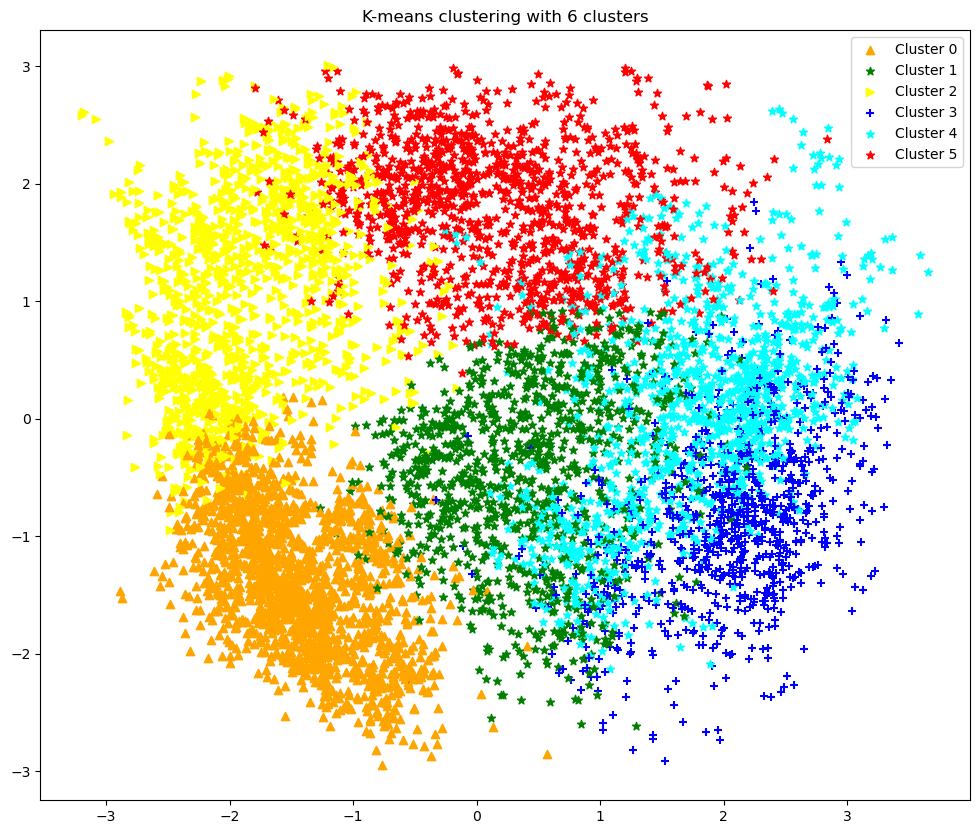

In [45]:
plt.figure(figsize = (12,10))

for i in tqdm(range(pca.shape[0])):
    if labels[i] == 0:
        c1_6 = plt.scatter(pca[i][0], pca[i][1], c = 'orange', marker = '^')
    elif labels[i] == 1:
        c2_6 = plt.scatter(pca[i][0], pca[i][1], c = 'green', marker = '*')
    elif labels[i] == 2:
        c3_6 = plt.scatter(pca[i][0], pca[i][1], c = 'yellow', marker = '>')
    elif labels[i] == 3:
        c4_6 = plt.scatter(pca[i][0], pca[i][1], c = 'blue', marker = '+')
    elif labels[i] == 4:
        c5_6 = plt.scatter(pca[i][0], pca[i][1], c = 'cyan', marker = '*')
    elif labels[i] == 5:
        c6_6 = plt.scatter(pca[i][0], pca[i][1], c = 'red', marker = '*')
        
plt.legend([c1_6, c2_6, c3_6, c4_6, c5_6, c6_6],['Cluster 0', 'Cluster 1', 
                                                 'Cluster 2', 'Cluster 3', 
                                                 'Cluster 4', 'Cluster 5'])

plt.title('K-means clustering with 6 clusters')
plt.show()